In [17]:
import pandas as pd
import numpy as np
import os
import glob
import random

import warnings
warnings.filterwarnings("ignore")

## Baseline

In [18]:
train = pd.read_csv('./data/train/train.csv')

In [19]:
train.tail()

,Day,Hour,Minute,DHI,DNI,WS,RH,T,TARGET
52555,1094,21,30,0,0,2.4,70.70,-4,0.0
52556,1094,22,0,0,0,2.4,66.79,-4,0.0
52557,1094,22,30,0,0,2.2,66.78,-4,0.0
52558,1094,23,0,0,0,2.1,67.72,-4,0.0
52559,1094,23,30,0,0,2.1,67.70,-4,0.0


In [20]:
submission = pd.read_csv('./data/sample_submission.csv')

In [21]:
submission.tail()

,id,q_0.1,q_0.2,q_0.3,q_0.4,q_0.5,q_0.6,q_0.7,q_0.8,q_0.9
7771,80.csv_Day8_21h30m,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7772,80.csv_Day8_22h00m,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7773,80.csv_Day8_22h30m,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7774,80.csv_Day8_23h00m,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7775,80.csv_Day8_23h30m,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
def preprocess_data(data, is_train=True):
    
    temp = data.copy()
    temp = temp[['Hour', 'TARGET', 'DHI', 'DNI', 'WS', 'RH', 'T']]

    if is_train==True:          
    
        temp['Target1'] = temp['TARGET'].shift(-48).fillna(method='ffill')
        temp['Target2'] = temp['TARGET'].shift(-48*2).fillna(method='ffill')
        temp = temp.dropna()
        
        return temp.iloc[:-96]

    elif is_train==False:
        
        temp = temp[['Hour', 'TARGET', 'DHI', 'DNI', 'WS', 'RH', 'T']]
                              
        return temp


df_train = preprocess_data(train)
df_train.iloc[:48]

,Hour,TARGET,DHI,DNI,WS,RH,T,Target1,Target2
0,0,0.000000,0,0,1.5,69.08,-12,0.000000,0.000000
1,0,0.000000,0,0,1.5,69.06,-12,0.000000,0.000000
2,1,0.000000,0,0,1.6,71.78,-12,0.000000,0.000000
3,1,0.000000,0,0,1.6,71.75,-12,0.000000,0.000000
4,2,0.000000,0,0,1.6,75.20,-12,0.000000,0.000000
5,2,0.000000,0,0,1.5,69.29,-11,0.000000,0.000000
6,3,0.000000,0,0,1.5,72.56,-11,0.000000,0.000000
7,3,0.000000,0,0,1.4,72.55,-11,0.000000,0.000000
8,4,0.000000,0,0,1.3,74.62,-11,0.000000,0.000000
9,4,0.000000,0,0,1.3,74.61,-11,0.000000,0.000000


In [25]:
train.iloc[48:96]

,Day,Hour,Minute,DHI,DNI,WS,RH,T,TARGET
48,1,0,0,0,0,1.6,90.66,-10,0.000000
49,1,0,30,0,0,1.6,90.68,-10,0.000000
50,1,1,0,0,0,1.6,88.11,-11,0.000000
51,1,1,30,0,0,1.6,88.11,-11,0.000000
52,1,2,0,0,0,1.6,90.85,-11,0.000000
53,1,2,30,0,0,1.6,90.84,-11,0.000000
54,1,3,0,0,0,1.7,93.78,-12,0.000000
55,1,3,30,0,0,1.7,93.77,-12,0.000000
56,1,4,0,0,0,1.7,90.46,-12,0.000000
57,1,4,30,0,0,1.6,90.46,-12,0.000000


In [26]:
train.iloc[48+48:96+48]

,Day,Hour,Minute,DHI,DNI,WS,RH,T,TARGET
96,2,0,0,0,0,2.2,73.80,-8,0.000000
97,2,0,30,0,0,2.1,68.20,-8,0.000000
98,2,1,0,0,0,2.1,69.06,-8,0.000000
99,2,1,30,0,0,2.1,69.04,-8,0.000000
100,2,2,0,0,0,2.2,69.38,-8,0.000000
101,2,2,30,0,0,2.2,69.36,-7,0.000000
102,2,3,0,0,0,2.2,70.03,-7,0.000000
103,2,3,30,0,0,2.2,70.02,-7,0.000000
104,2,4,0,0,0,2.3,72.18,-7,0.000000
105,2,4,30,0,0,2.4,66.78,-7,0.000000


In [27]:
df_train.tail()

,Hour,TARGET,DHI,DNI,WS,RH,T,Target1,Target2
52459,21,0.0,0,0,3.5,55.97,-1,0.0,0.0
52460,22,0.0,0,0,3.9,54.23,-2,0.0,0.0
52461,22,0.0,0,0,4.1,54.21,-2,0.0,0.0
52462,23,0.0,0,0,4.3,56.46,-2,0.0,0.0
52463,23,0.0,0,0,4.1,56.44,-2,0.0,0.0


In [28]:
df_test = []

for i in range(81):
    file_path = './data/test/' + str(i) + '.csv'
    temp = pd.read_csv(file_path)
    temp = preprocess_data(temp, is_train=False)
    df_test.append(temp)

X_test = pd.concat(df_test)
X_test.shape

(27216, 7)

In [32]:
Col = X_test['TARGET']>0

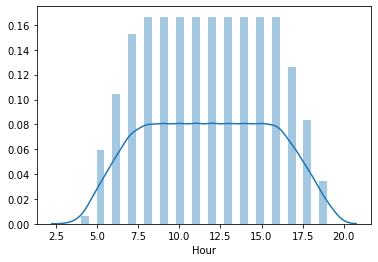

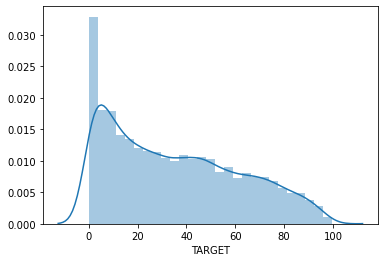

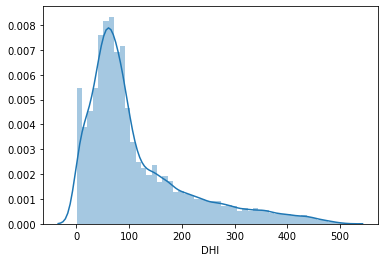

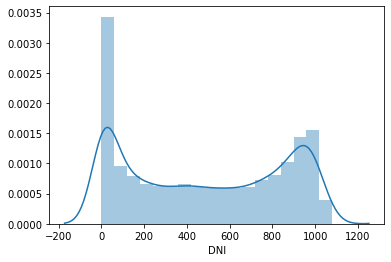

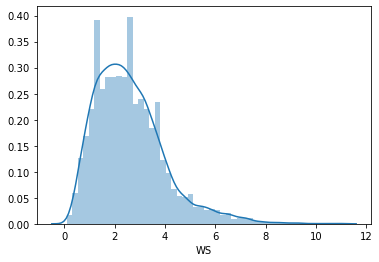

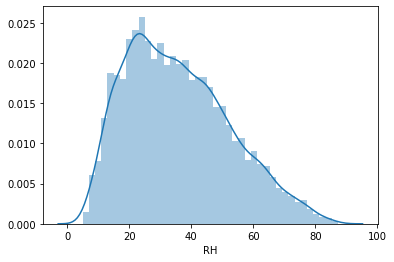

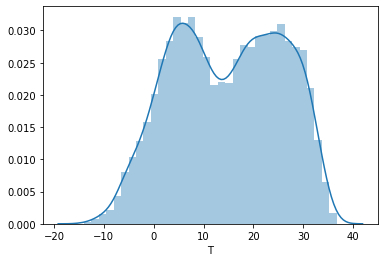

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
df=X_test[Col]
for i, col in enumerate(df.columns):
    plt.figure(i)
    sns.distplot(df[col])

In [29]:
X_test.to_csv('see.csv')

In [12]:
X_test.head(48)

,Hour,TARGET,DHI,DNI,WS,RH,T
288,0,0.000000,0,0,0.8,80.92,-2.8
289,0,0.000000,0,0,0.9,81.53,-2.9
290,1,0.000000,0,0,1.0,79.91,-3.0
291,1,0.000000,0,0,0.9,79.91,-3.0
292,2,0.000000,0,0,0.9,77.20,-3.0
293,2,0.000000,0,0,1.1,78.36,-3.2
294,3,0.000000,0,0,1.2,76.78,-3.4
295,3,0.000000,0,0,1.8,77.93,-3.6
296,4,0.000000,0,0,2.4,76.89,-3.8
297,4,0.000000,0,0,2.9,78.64,-4.1


In [15]:
df_train.head()

,Hour,TARGET,DHI,DNI,WS,RH,T,Target1,Target2
0,0,0.0,0,0,1.5,69.08,-12,0.0,0.0
1,0,0.0,0,0,1.5,69.06,-12,0.0,0.0
2,1,0.0,0,0,1.6,71.78,-12,0.0,0.0
3,1,0.0,0,0,1.6,71.75,-12,0.0,0.0
4,2,0.0,0,0,1.6,75.20,-12,0.0,0.0


In [16]:
df_train.iloc[-48:]

,Hour,TARGET,DHI,DNI,WS,RH,T,Target1,Target2
52416,0,0.000000,0,0,3.4,50.47,-1,0.000000,0.000000
52417,0,0.000000,0,0,3.4,50.45,0,0.000000,0.000000
52418,1,0.000000,0,0,3.5,50.30,0,0.000000,0.000000
52419,1,0.000000,0,0,3.5,50.30,0,0.000000,0.000000
52420,2,0.000000,0,0,3.5,51.14,0,0.000000,0.000000
52421,2,0.000000,0,0,3.5,51.12,0,0.000000,0.000000
52422,3,0.000000,0,0,3.6,52.09,0,0.000000,0.000000
52423,3,0.000000,0,0,3.7,48.39,0,0.000000,0.000000
52424,4,0.000000,0,0,3.8,49.00,0,0.000000,0.000000
52425,4,0.000000,0,0,3.9,49.00,0,0.000000,0.000000


In [17]:
from sklearn.model_selection import train_test_split
X_train_1, X_valid_1, Y_train_1, Y_valid_1 = train_test_split(df_train.iloc[:, :-2], df_train.iloc[:, -2], test_size=0.3, random_state=0)
X_train_2, X_valid_2, Y_train_2, Y_valid_2 = train_test_split(df_train.iloc[:, :-2], df_train.iloc[:, -1], test_size=0.3, random_state=0)

In [18]:
X_train_1.head()

,Hour,TARGET,DHI,DNI,WS,RH,T
32908,14,1.783051,19,0,2.3,63.64,3
10140,6,12.103848,45,473,1.8,66.74,19
32182,11,56.300682,77,929,2.2,39.56,13
20953,12,65.401188,310,525,1.5,23.71,15
36079,15,19.614206,70,536,0.5,46.63,0


In [19]:
X_test.head()

,Hour,TARGET,DHI,DNI,WS,RH,T
288,0,0.0,0,0,0.8,80.92,-2.8
289,0,0.0,0,0,0.9,81.53,-2.9
290,1,0.0,0,0,1.0,79.91,-3.0
291,1,0.0,0,0,0.9,79.91,-3.0
292,2,0.0,0,0,0.9,77.20,-3.0


In [20]:
X_test.head()

,Hour,TARGET,DHI,DNI,WS,RH,T
288,0,0.0,0,0,0.8,80.92,-2.8
289,0,0.0,0,0,0.9,81.53,-2.9
290,1,0.0,0,0,1.0,79.91,-3.0
291,1,0.0,0,0,0.9,79.91,-3.0
292,2,0.0,0,0,0.9,77.20,-3.0


In [21]:
quantiles = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

In [22]:
from lightgbm import LGBMRegressor

# Get the model and the predictions in (a) - (b)
def LGBM(q, X_train, Y_train, X_valid, Y_valid, X_test):
    
    # (a) Modeling  
    model = LGBMRegressor(objective='quantile', alpha=q,
                         n_estimators=10000, bagging_fraction=0.7, learning_rate=0.0, subsample=0.7)                   
                         
                         
    model.fit(X_train, Y_train, eval_metric = ['quantile'], 
          eval_set=[(X_valid, Y_valid)], early_stopping_rounds=300, verbose=500)

    # (b) Predictions
    pred = pd.Series(model.predict(X_test).round(2))
    return pred, model

In [23]:
# Target 예측

def train_data(X_train, Y_train, X_valid, Y_valid, X_test):

    LGBM_models=[]
    LGBM_actual_pred = pd.DataFrame()

    for q in quantiles:
        print(q)
        pred , model = LGBM(q, X_train, Y_train, X_valid, Y_valid, X_test)
        LGBM_models.append(model)
        LGBM_actual_pred = pd.concat([LGBM_actual_pred,pred],axis=1)

    LGBM_actual_pred.columns=quantiles
    
    return LGBM_models, LGBM_actual_pred

In [24]:
# Target1
models_1, results_1 = train_data(X_train_1, Y_train_1, X_valid_1, Y_valid_1, X_test)
results_1.sort_index()[:48]

0.1
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.7 will be ignored. Current value: bagging_fraction=0.7
Training until validation scores don't improve for 300 rounds
[500]	valid_0's quantile: 1.36742
Early stopping, best iteration is:
[234]	valid_0's quantile: 1.36639
0.2
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.7 will be ignored. Current value: bagging_fraction=0.7
Training until validation scores don't improve for 300 rounds
[500]	valid_0's quantile: 2.1868
[1000]	valid_0's quantile: 2.18089
[1500]	valid_0's quantile: 2.1782
[2000]	valid_0's quantile: 2.1732
[2500]	valid_0's quantile: 2.17177
[3000]	valid_0's quantile: 2.16808
[3500]	valid_0's quantile: 2.16616
Early stopping, best iteration is:
[3386]	valid_0's quantile: 2.16539
0.3
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.7 will be ignored. Current value: bagging_fraction=0.7
Training until validation scores don't improve for 300 rounds
[500]	valid_0's quantile: 2.57271
[10

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
6,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
7,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
8,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
9,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [25]:
# Target2
models_2, results_2 = train_data(X_train_2, Y_train_2, X_valid_2, Y_valid_2, X_test)
results_2.sort_index()[:48]

0.1
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.7 will be ignored. Current value: bagging_fraction=0.7
Training until validation scores don't improve for 300 rounds
[500]	valid_0's quantile: 1.3834
[1000]	valid_0's quantile: 1.38291
Early stopping, best iteration is:
[1115]	valid_0's quantile: 1.38269
0.2
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.7 will be ignored. Current value: bagging_fraction=0.7
Training until validation scores don't improve for 300 rounds
[500]	valid_0's quantile: 2.20768
[1000]	valid_0's quantile: 2.20275
Early stopping, best iteration is:
[760]	valid_0's quantile: 2.20118
0.3
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.7 will be ignored. Current value: bagging_fraction=0.7
Training until validation scores don't improve for 300 rounds
[500]	valid_0's quantile: 2.60601
[1000]	valid_0's quantile: 2.59062
[1500]	valid_0's quantile: 2.57973
[2000]	valid_0's quantile: 2.57173
Early stopping, best iteration is:
[

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
6,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
7,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
8,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
9,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [38]:
df = pd.DataFrame({'a': [0, -1, 2], 'b': [-3, 2, 1]})


In [39]:
df

,a,b
0,0,-3
1,-1,2
2,2,1


In [40]:
df[df < 0] 

,a,b
0,NaN,-3.0
1,-1.0,NaN
2,NaN,NaN


In [37]:
df

,a,b
0,0,0
1,0,2
2,2,1


In [1]:
results_1.sort_index().iloc[:48]

NameError: name 'results_1' is not defined

In [34]:
results_2.sort_index()

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
3883,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3884,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3885,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3886,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
print(results_1.shape, results_2.shape)

(3888, 9) (3888, 9)


In [36]:
submission.loc[submission.id.str.contains("Day7"), "q_0.1":] = results_1.sort_index().values
submission.loc[submission.id.str.contains("Day8"), "q_0.1":] = results_2.sort_index().values
submission

,id,q_0.1,q_0.2,q_0.3,q_0.4,q_0.5,q_0.6,q_0.7,q_0.8,q_0.9
0,0.csv_Day7_0h00m,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.csv_Day7_0h30m,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.csv_Day7_1h00m,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.csv_Day7_1h30m,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.csv_Day7_2h00m,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
7771,80.csv_Day8_21h30m,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7772,80.csv_Day8_22h00m,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7773,80.csv_Day8_22h30m,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7774,80.csv_Day8_23h00m,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
submission.iloc[:48]

,id,q_0.1,q_0.2,q_0.3,q_0.4,q_0.5,q_0.6,q_0.7,q_0.8,q_0.9
0,0.csv_Day7_0h00m,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.csv_Day7_0h30m,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0.csv_Day7_1h00m,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,0.csv_Day7_1h30m,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,0.csv_Day7_2h00m,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,0.csv_Day7_2h30m,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
6,0.csv_Day7_3h00m,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
7,0.csv_Day7_3h30m,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
8,0.csv_Day7_4h00m,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
9,0.csv_Day7_4h30m,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [38]:
submission.iloc[48:96]

,id,q_0.1,q_0.2,q_0.3,q_0.4,q_0.5,q_0.6,q_0.7,q_0.8,q_0.9
48,0.csv_Day8_0h00m,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
49,0.csv_Day8_0h30m,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50,0.csv_Day8_1h00m,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
51,0.csv_Day8_1h30m,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
52,0.csv_Day8_2h00m,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
53,0.csv_Day8_2h30m,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
54,0.csv_Day8_3h00m,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
55,0.csv_Day8_3h30m,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
56,0.csv_Day8_4h00m,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
57,0.csv_Day8_4h30m,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [39]:
submission.to_csv('./data/submission_v3.csv', index=False)